<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(3_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.6'

In [5]:
os.listdir(base_path)

['data_add_delta_3.6_n250.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n20.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.704483,28.465166,20.002092,-40.813899,54.357841,1673.888111,-1619.530270
1,0.0,1.0,59.428038,74.168628,88.607498,-2512.469089,-2280.264925,-1045.838917,-1234.426008
2,0.0,2.0,22.366686,65.241173,82.753151,-1520.406999,-1340.045989,-242.658222,-1097.387768
3,0.0,3.0,27.762156,46.942166,52.662598,-75.080764,62.286157,704.565123,-642.278966
4,0.0,4.0,21.016415,93.870711,92.223584,-9925.193927,-9708.083217,-755.016278,-8953.066939
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.144670,49.165115,73.425994,-514.661528,-293.925749,-257.413678,-36.512071
29996,999.0,26.0,32.800167,78.428206,91.001221,1645.075824,1857.305417,829.401484,1027.903934
29997,999.0,27.0,85.601139,49.853549,52.765476,1954.069927,2152.290091,-507.655549,2659.945640
29998,999.0,28.0,80.793296,66.246994,93.767197,-81.289265,169.518222,-64.453941,233.972163


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.704483,28.465166,20.002092,-40.813899,54.357841,1673.888111,-1619.530270
1,0.0,1.0,59.428038,74.168628,88.607498,-2512.469089,-2280.264925,-1045.838917,-1234.426008
2,0.0,2.0,22.366686,65.241173,82.753151,-1520.406999,-1340.045989,-242.658222,-1097.387768
3,0.0,3.0,27.762156,46.942166,52.662598,-75.080764,62.286157,704.565123,-642.278966
4,0.0,4.0,21.016415,93.870711,92.223584,-9925.193927,-9708.083217,-755.016278,-8953.066939
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.144670,49.165115,73.425994,-514.661528,-293.925749,-257.413678,-36.512071
29996,999.0,26.0,32.800167,78.428206,91.001221,1645.075824,1857.305417,829.401484,1027.903934
29997,999.0,27.0,85.601139,49.853549,52.765476,1954.069927,2152.290091,-507.655549,2659.945640
29998,999.0,28.0,80.793296,66.246994,93.767197,-81.289265,169.518222,-64.453941,233.972163


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    36.704483  28.465166  ...  1673.888111 -1619.530270
      1.0    59.428038  74.168628  ... -1045.838917 -1234.426008
      2.0    22.366686  65.241173  ...  -242.658222 -1097.387768
      3.0    27.762156  46.942166  ...   704.565123  -642.278966
      4.0    21.016415  93.870711  ...  -755.016278 -8953.066939
...                ...        ...  ...          ...          ...
999.0 25.0   88.144670  49.165115  ...  -257.413678   -36.512071
      26.0   32.800167  78.428206  ...   829.401484  1027.903934
      27.0   85.601139  49.853549  ...  -507.655549  2659.945640
      28.0   80.793296  66.246994  ...   -64.453941   233.972163
      29.0   24.934721  64.471041  ...   982.491692    65.772457

[30000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    36.704483  28.465166  ...  1673.888111 -1619.530270
      1.0    59.428038  74.168628  ... -1045.838917 -1234.426008
      2.0    22.366686  65.241173  ...  -242.658222 -1097.387768
      3.0    27.762156  46.942166  ...   704.565123  -642.278966
      4.0    21.016415  93.870711  ...  -755.016278 -8953.066939
...                ...        ...  ...          ...          ...
999.0 25.0   88.144670  49.165115  ...  -257.413678   -36.512071
      26.0   32.800167  78.428206  ...   829.401484  1027.903934
      27.0   85.601139  49.853549  ...  -507.655549  2659.945640
      28.0   80.793296  66.246994  ...   -64.453941   233.972163
      29.0   24.934721  64.471041  ...   982.491692    65.772457

[30000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.704483,28.465166,20.002092,-40.813899,54.357841,1673.888111,-1619.530270
1,0.0,1.0,59.428038,74.168628,88.607498,-2512.469089,-2280.264925,-1045.838917,-1234.426008
2,0.0,2.0,22.366686,65.241173,82.753151,-1520.406999,-1340.045989,-242.658222,-1097.387768
3,0.0,3.0,27.762156,46.942166,52.662598,-75.080764,62.286157,704.565123,-642.278966
4,0.0,4.0,21.016415,93.870711,92.223584,-9925.193927,-9708.083217,-755.016278,-8953.066939
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.144670,49.165115,73.425994,-514.661528,-293.925749,-257.413678,-36.512071
29996,999.0,26.0,32.800167,78.428206,91.001221,1645.075824,1857.305417,829.401484,1027.903934
29997,999.0,27.0,85.601139,49.853549,52.765476,1954.069927,2152.290091,-507.655549,2659.945640
29998,999.0,28.0,80.793296,66.246994,93.767197,-81.289265,169.518222,-64.453941,233.972163


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    36.704483  28.465166  ...  1673.888111 -1619.530270
      1.0    59.428038  74.168628  ... -1045.838917 -1234.426008
      2.0    22.366686  65.241173  ...  -242.658222 -1097.387768
      3.0    27.762156  46.942166  ...   704.565123  -642.278966
      4.0    21.016415  93.870711  ...  -755.016278 -8953.066939
...                ...        ...  ...          ...          ...
999.0 25.0   88.144670  49.165115  ...  -257.413678   -36.512071
      26.0   32.800167  78.428206  ...   829.401484  1027.903934
      27.0   85.601139  49.853549  ...  -507.655549  2659.945640
      28.0   80.793296  66.246994  ...   -64.453941   233.972163
      29.0   24.934721  64.471041  ...   982.491692    65.772457

[30000 rows x 7 columns]

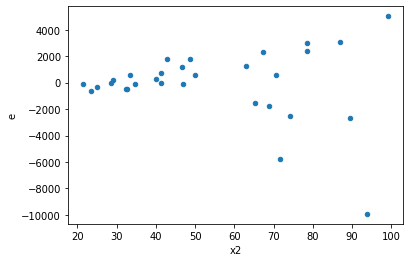

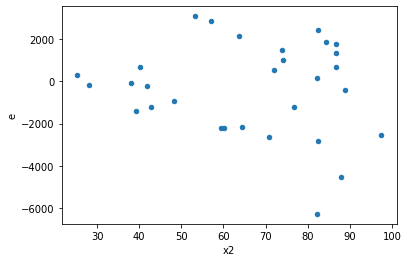

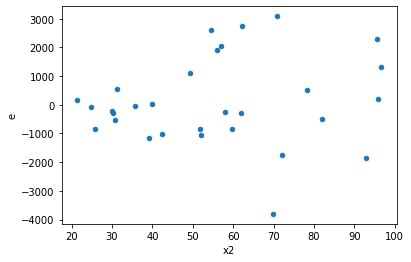

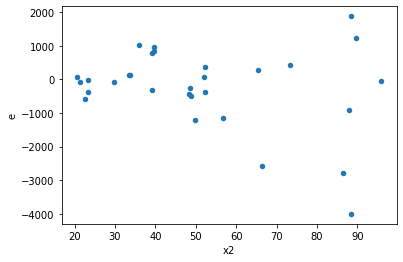

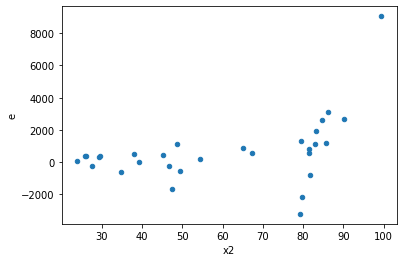

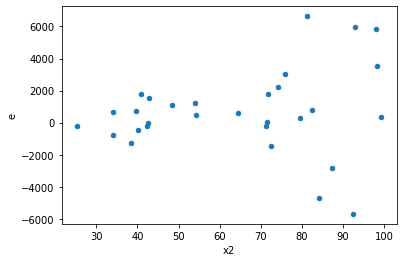

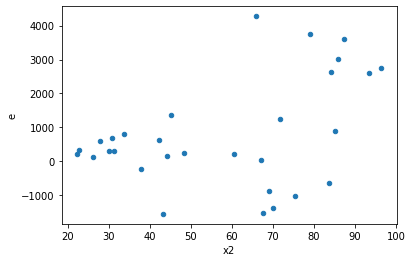

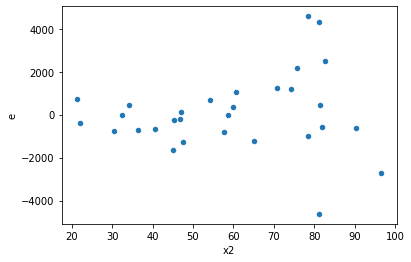

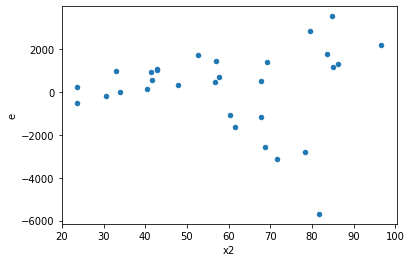

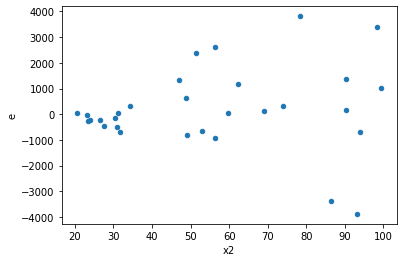

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,827190.8636310588,126329823.85314614,91910.09595900653,14036647.094794014,152.7214931975982,1.87773250281964e-08,0.9999999906113375,9.3886625140982e-09,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,31964817.548045572,65547172.765256435,3551646.394227286,7283019.196139604,2.050603688468861,0.29967706857708154,0.8501614657114592,0.14983853428854077,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,3465007.2931636376,15789396.180653434,385000.8103515153,1754377.353405937,4.556814703335681,0.03389964547967361,0.9830501772601632,0.016949822739836806,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,1694404.6429361985,27889017.428073827,188267.1825484665,3098779.714230425,16.459478876158844,0.0002884776609508588,0.9998557611695246,0.0001442388304754294,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,1840128.3820071926,13057776.986519895,204458.70911191028,1450864.1096133217,7.096122810885951,0.007476399083110152,0.9962618004584449,0.003738199541555076,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,7472221.915748581,152279779.87254515,830246.8795276202,16919975.541393906,20.379450930331405,0.00011963413179261195,0.9999401829341037,5.9817065896305976e-05,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,2743273.6623122855,21906590.050305486,304808.18470136507,2434065.561145054,7.9855649661436185,0.004859984205105583,0.9975700078974472,0.0024299921025527915,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,2695360.313705849,62109973.00728282,299484.4793006499,6901108.111920314,23.043291351978045,7.161949399336898e-05,0.9999641902530033,3.580974699668449e-05,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,1882160.7360937793,66384646.27230965,209128.9706770866,7376071.808034406,35.270444760251344,1.1733160096172313e-05,0.9999941334199519,5.866580048086156e-06,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,827190.8636310588,126329823.85314614,91910.09595900653,14036647.094794014,152.7214931975982,1.87773250281964e-08,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,31964817.548045572,65547172.765256435,3551646.394227286,7283019.196139604,2.050603688468861,0.29967706857708154,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,3465007.2931636376,15789396.180653434,385000.8103515153,1754377.353405937,4.556814703335681,0.03389964547967361,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,1694404.6429361985,27889017.428073827,188267.1825484665,3098779.714230425,16.459478876158844,0.0002884776609508588,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,1840128.3820071926,13057776.986519895,204458.70911191028,1450864.1096133217,7.096122810885951,0.007476399083110152,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,7472221.915748581,152279779.87254515,830246.8795276202,16919975.541393906,20.379450930331405,0.00011963413179261195,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,2743273.6623122855,21906590.050305486,304808.18470136507,2434065.561145054,7.9855649661436185,0.004859984205105583,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,2695360.313705849,62109973.00728282,299484.4793006499,6901108.111920314,23.043291351978045,7.161949399336898e-05,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,1882160.7360937793,66384646.27230965,209128.9706770866,7376071.808034406,35.270444760251344,1.1733160096172313e-05,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    856
Reject001=1 : Homoscedasticity      144
Name: Result_test, dtype: int64